# Merging the datasets received on Monday January 13th.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the 'cost_v1.csv' dataset

In [4]:
costs = pd.read_csv('../datasets_v2/cost_v1.csv')

### Loading the 'dwell_time_v1.csv' dataset

In [5]:
dwell_time = pd.read_csv('../datasets_v2/dwell_time_v1.csv')

### Loading the 'mall_traffic.csv' dataset

In [6]:
mall_traffic = pd.read_csv('../datasets_v2/mall_traffic.csv')

### Loading the 'mall_v1.csv' dataset

In [7]:
mall = pd.read_csv('../datasets_v2/mall_v1.csv')

### Loading the 'people_flow_v1.csv' dataset

In [8]:
people_flow = pd.read_csv('../datasets_v2/people_flow_v1.csv')

### Loading the 'referenciel_traffic_v1.csv' dataset

In [9]:
referenciel_traffic = pd.read_csv('../datasets_v2/referenciel_traffic_v1.csv')

### Loading the 'store_v1.csv' dataset

In [10]:
store = pd.read_csv('../datasets_v2/store_v1.csv')

## Merging the dataframes in one

### Merging 'store', 'costs' and 'referenciel_traffic' on 'store_id' key.

In [26]:
df = pd.merge(referenciel_traffic, store, on='store_id', how='inner')

In [30]:
df = pd.merge(df, costs, on='store_id' , how='inner')

### Merging 'people_flow' and 'df' on 'block_id' key.

In [32]:
df = pd.merge(df, people_flow, on=['block_id', 'external_mall_id'], how='inner')

### Merging 'mall' and 'df' on 'mall_id' key.

In [34]:
df = pd.merge(df, mall, on='mall_id', how='inner')

### Merging 'mall_traffic', 'dwell_time' and 'df' on 'external_mall_id' key.

In [36]:
df = pd.merge(df, mall_traffic, on='external_mall_id', how='inner')

In [39]:
df = pd.merge(df, dwell_time, on=['external_mall_id', 'block_id'], how='inner')

## EDA

In [42]:
df.columns

Index(['store_id', 'block_id', 'external_mall_id', 'store_name', 'mall_id',
       'store_year_opened', 'store_year_closed', 'store_branch_level_1',
       'store_branch_level_2', 'store_branch_level_3', 'store_sales_r12m',
       'store_rent_r12m', 'store_area', 'rent_incentive_r12m',
       'service_charges_r12m', 'marketing_costs_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m',
       'large_scale_works_r12m', 'maintenance_works_r12m',
       'store_visits_monthly_average', 'store_window_flow_monthly_average',
       'store_visits_daily_average', 'store_window_flow_daily_average',
       'store_total_visits', 'store_total_window_flow',
       'days_with_traffic_data', 'mall_name', 'mall_country',
       'total_mall_area', 'visits_in_monthly_average',
       'visits_out_monthly_average', 'visits_in_daily_average',
       'visits_out_daily_average', 'total_visits_in', 'total_visits_out',
       'avg_dwell_time', 'average_dwell_time', 'median_dwell_time'],
      dtyp

In [43]:
df.shape

(3646, 39)

### Creating a 'total_costs' variable.

In [44]:
df['total_costs'] = (df['service_charges_r12m'] + df['marketing_costs_r12m'] + df['administration_fees_r12m']
                        + df['real_estate_taxes_r12m'] + df['large_scale_works_r12m'] + df['maintenance_works_r12m'])

### Plotting the average costs

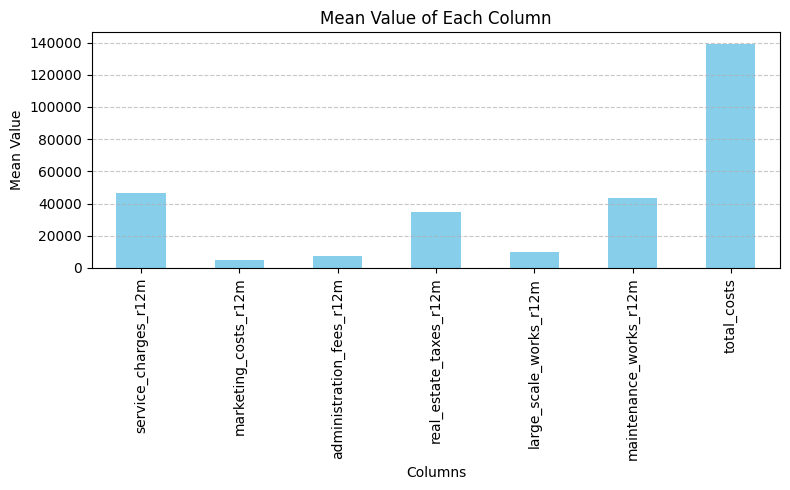

In [48]:
# Calculate the mean of each column
cost_columns = ['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m',
                        'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'total_costs']
column_means = df[cost_columns].mean()

# Plot the mean values
plt.figure(figsize=(8, 5))
column_means.plot(kind='bar', color='skyblue')
plt.title('Mean Value of Each Column')
plt.xlabel('Columns')
plt.ylabel('Mean Value')

# Set the x-axis labels vertically
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()